**Predict Future Stock Prices (Short-Term)**

Objective:
 Use historical stock data to predict the next day's closing price.
Dataset:
 Stock market data from Yahoo Finance (retrieved using the yfinance Python library)

Instructions:

● Select a stock (e.g., Apple, Tesla).

● Load historical data using the yfinance library.

● Use features like Open, High, Low, and Volume to predict the next Close price.

● Train a Linear Regression or Random Forest model.

● Plot actual vs predicted closing prices for comparison.

**Loading Historical Stock Data**

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

In [ ]:
ticker = "AAPL"
data = yf.download(ticker, start="2022-01-01", end="2025-01-01") #Downloading last 3 years of data

/tmp/ipython-input-1675330693.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2022-01-01", end="2025-01-01") #Downloading last 3 years of data
[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.270279,179.122413,174.058642,174.176172,104487900
2022-01-04,176.007782,179.181217,175.439697,178.877588,99310400
2022-01-05,171.326004,176.468135,171.051758,175.919643,94537600
2022-01-06,168.466003,171.698203,168.113400,169.151618,96904000
2022-01-07,168.632477,170.562001,167.515901,169.337684,86709100


In [ ]:
data.shape

(753, 5)

In [ ]:
data.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2022-01-03 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   753 non-null    float64
 1   (High, AAPL)    753 non-null    float64
 2   (Low, AAPL)     753 non-null    float64
 3   (Open, AAPL)    753 non-null    float64
 4   (Volume, AAPL)  753 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.3 KB


**Exploratory Data Analysis**



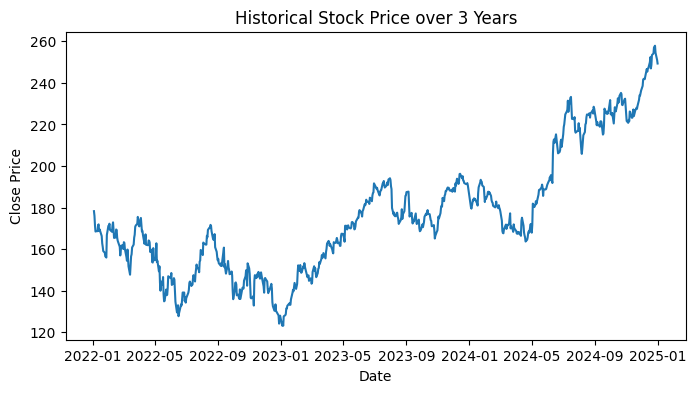

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(data.index, data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Historical Stock Price over 3 Years')
plt.show()

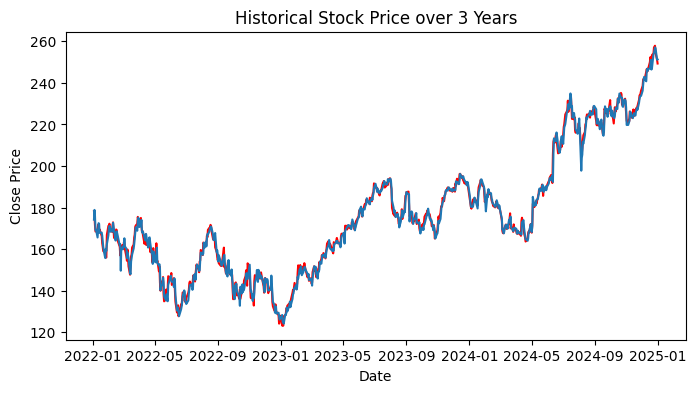

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(data.index, data['Close'], color='red')
plt.plot(data.index, data['Open'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Historical Stock Price over 3 Years')
plt.show()

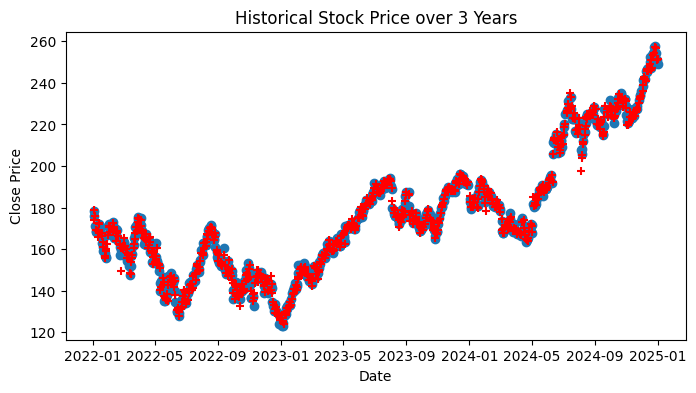

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(data.index, data['Close'])
plt.scatter(data.index, data['Open'],color='red', marker='+')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Historical Stock Price over 3 Years')
plt.show()

In [ ]:
for col in data.columns:
  print(f"{col}, {data[col].min(), data[col].max()}")

('Close', 'AAPL'), (123.16194152832031, 257.853759765625)
('High', 'AAPL'), (125.87107085400619, 258.9289141129315)
('Low', 'AAPL'), (122.32457886036785, 256.47003399402934)
('Open', 'AAPL'), (124.13723942127505, 257.0275101814573)
('Volume', 'AAPL'), (23234700, 318679900)


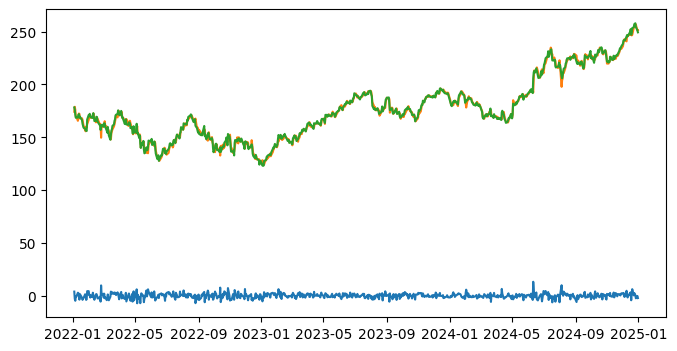

In [ ]:
difference = data['Close'] - data['Open']
plt.figure(figsize=(8, 4))
plt.plot(data.index, difference)
plt.plot(data.index, data['Open'])
plt.plot(data.index, data['Close'])

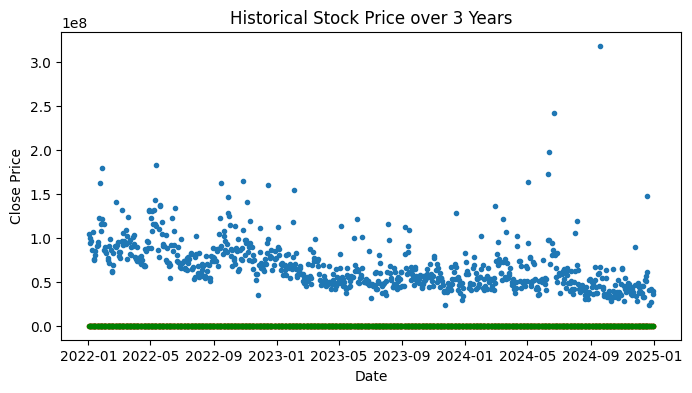

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(data.index, data['Volume'], marker='.')
plt.scatter(data.index, data['Low'],color='red', marker='.')
plt.scatter(data.index, data['Close'],color='g', marker='.')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Historical Stock Price over 3 Years')
plt.show()

In [ ]:
data2 = data.copy()

In [ ]:
data2['Direction'] = data2['Close'] - data2['Open']
bullish = data2[data2['Direction'] > 0]
bearish = data2[data2['Direction'] < 0]

In [ ]:
bullish.head() #Bullish days when close was higher than the open price

Price,Close,High,Low,Open,Volume,Direction
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2022-01-03,178.270279,179.122413,174.058642,174.176172,104487900,4.094107
2022-01-10,168.652100,168.955728,164.714692,165.605999,106765600,3.046101
2022-01-11,171.482712,171.580648,167.310245,168.779426,76138300,2.703286
2022-01-14,169.514008,170.209411,167.574679,167.819542,80440800,1.694465
2022-01-24,158.299286,158.965322,151.521469,156.732169,162294600,1.567117


In [ ]:
bearish.head() # Bearish days when open was higher than the close price

Price,Close,High,Low,Open,Volume,Direction
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2022-01-04,176.007782,179.181217,175.439697,178.877588,99310400,-2.869806
2022-01-05,171.326004,176.468135,171.051758,175.919643,94537600,-4.593639
2022-01-06,168.466003,171.698203,168.113400,169.151618,96904000,-0.685614
2022-01-07,168.632477,170.562001,167.515901,169.337684,86709100,-0.705208
2022-01-12,171.923477,173.539570,171.228074,172.501351,74805200,-0.577874


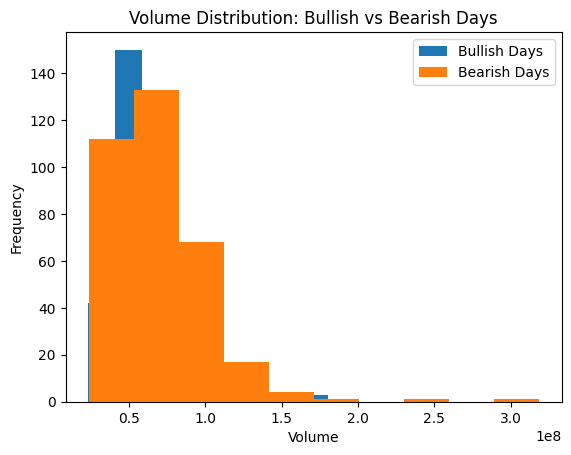

In [ ]:
plt.hist(bullish['Volume'], label='Bullish Days')
plt.hist(bearish['Volume'], label='Bearish Days')
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.title("Volume Distribution: Bullish vs Bearish Days")
plt.legend()
plt.show()

**Data Preparation**

In [ ]:
data2['NextDay_Close'] = data2['Close'].shift(-1)

In [ ]:
data2.head()

Price,Close,High,Low,Open,Volume,Direction,NextDay_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2022-01-03,178.270279,179.122413,174.058642,174.176172,104487900,4.094107,176.007782
2022-01-04,176.007782,179.181217,175.439697,178.877588,99310400,-2.869806,171.326004
2022-01-05,171.326004,176.468135,171.051758,175.919643,94537600,-4.593639,168.466003
2022-01-06,168.466003,171.698203,168.113400,169.151618,96904000,-0.685614,168.632477
2022-01-07,168.632477,170.562001,167.515901,169.337684,86709100,-0.705208,168.652100


In [ ]:
data2.isna().sum()

,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0
Direction,,0
NextDay_Close,,1


In [ ]:
data2.dropna(inplace=True)

In [ ]:
data2.isna().sum()

,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0
Direction,,0
NextDay_Close,,0


In [ ]:
from sklearn.model_selection import train_test_split
x = data2.drop(['NextDay_Close', 'Close'], axis=1)
y = data2['NextDay_Close']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((601, 5), (151, 5), (601,), (151,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled  = sc.transform(x_test)

In [ ]:
x_train_scaled

array([[-0.18803205, -0.15257529, -0.15494175,  0.89741609,  0.12223512],
       [-1.15088475, -1.17488886, -1.20443649,  0.09371882,  0.94025332],
       [-0.60758936, -0.72356389, -0.68038556,  2.18635116, -0.66609583],
       ...,
       [-1.20691359, -1.15495961, -1.1995563 , -0.09163273,  0.56531759],
       [-0.21608937, -0.22975313, -0.16637145, -0.05508311, -1.00910336],
       [-1.00961728, -1.01652299, -1.00015206,  1.22907779, -0.19058043]])

**Model Building, Training, & Testing**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
LR = LinearRegression()
RF = RandomForestRegressor()


In [ ]:
LR.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
RF.fit(x_train_scaled, y_train)

RandomForestRegressor()

In [ ]:
y_pred_lr = LR.predict(x_test_scaled)
y_pred_rf = RF.predict(x_test_scaled)

In [ ]:
LR.score(x_test_scaled, y_test)

0.9909684763517652

In [ ]:
RF.score(x_test_scaled, y_test)

0.9899751139640919

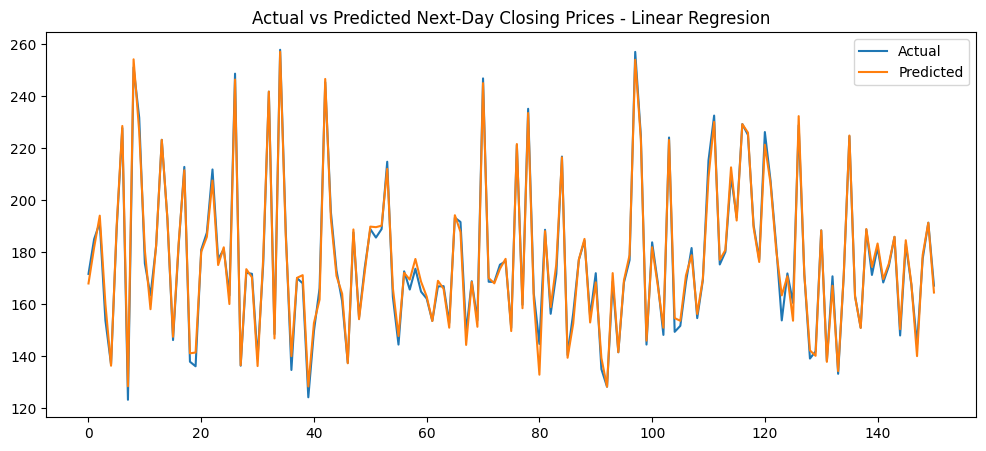

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lr, label='Predicted')
plt.title("Actual vs Predicted Next-Day Closing Prices - Linear Regresion")
plt.legend()
plt.show()

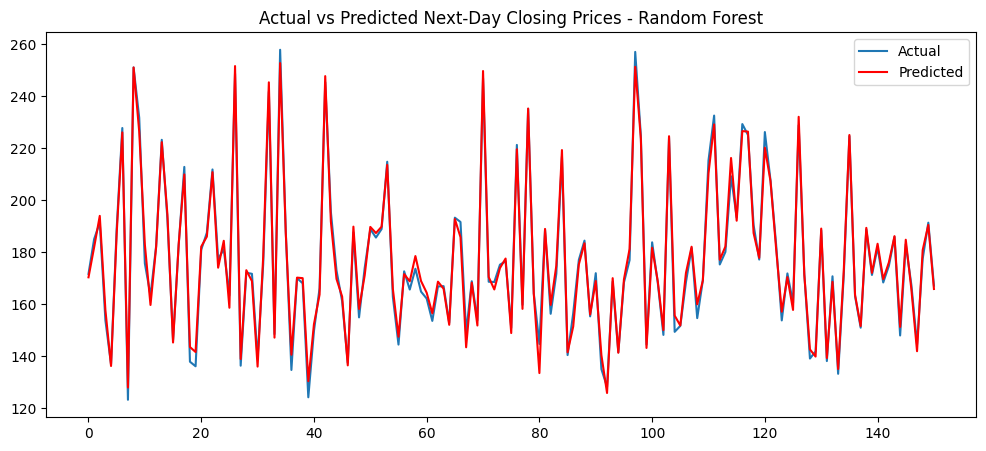

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_rf, label='Predicted', color='r')
plt.title("Actual vs Predicted Next-Day Closing Prices - Random Forest")
plt.legend()
plt.show()

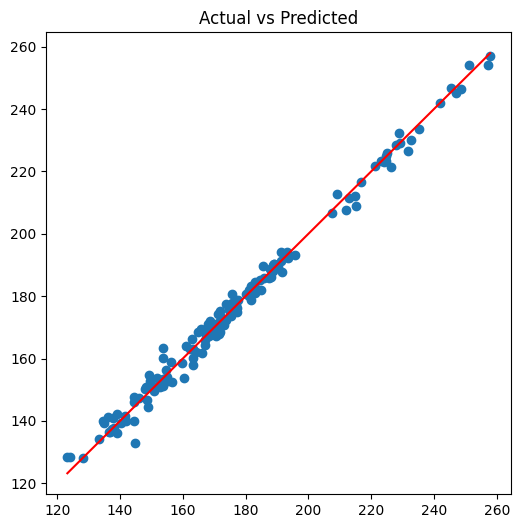

In [ ]:
#Plotting actual versus predicted prices over time provides a direct visual assessment of how well the model tracks real market behavior.
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()] , color='r')
plt.title("Actual vs Predicted")
plt.show()


**Explanation of Results**
The predictive models were trained to forecast the next day’s closing price of AAPL stock using Open, High, Low, and Volume as features. A Linear Regression (LR) model and a Random Forest (RF) model were implemented. The LR model achieved a score of 0.9909, while the RF model scored 0.9899 on the test set.

The actual vs predicted plots show that both models capture the overall trend of stock prices accurately. Predictions closely follow real closing prices, though minor deviations occur on highly volatile days.
The scatter plots of predicted versus actual prices confirm that most points lie near the ideal diagonal line, validating strong predictive performance.